#                                   Capstone Project

##                                         Client - INSAID Telcom 

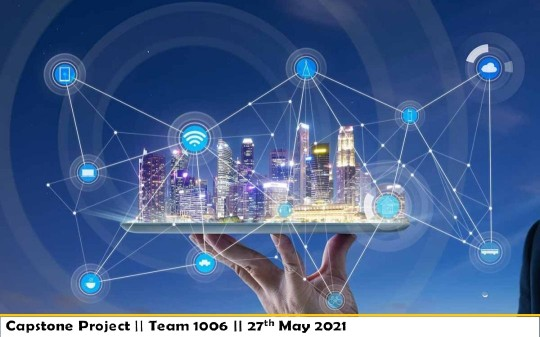

## Table of Contents

1. [Introduction to Data and Problem Statement](#section1)<br>
2. [Import Libraries](#section2)<br>
3. [Create MYSQL connection & Data Loading and Description](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
    - 4.1 [Treating Missing Values of States](#section401)<br>
    - 4.2 [Translation of Chinese Brand and Model Names](#section402)<br>
    - 4.3 [Treating Longitude and Lattitude](#section403)<br>
    - 4.4 [Treating missing device ids](#section404)<br>
    - 4.5 [Final merger of datasets](#section405)<br>
5. [Plots](#section5)
6. [Conclusion](#section6)

## 1. Introduction to Data and Problem Statement

InsaidTelecom, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive. Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India to help its clients better understand and interact with their audiences.

In this consulting assignment, Insaidians are expected to build a dashboard to understand user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties. Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

## 2. Import Libraries and create MYSQL connection

In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


## 3. Create MYSQL connection & Data Loading and Description

In [3]:
import mysql.connector

In [4]:
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database = "Capstone1"
   
)
print(mydb)

In [5]:
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM gender_age_train")
records = mycursor.fetchall()
gender = pd.DataFrame(records)
gender.head()

,0,1,2,3
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [6]:
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database = "Capstone1"
   
)
print(mydb)

In [7]:
cursor = mydb.cursor()
cursor.execute("SELECT * FROM phone_brand_device_model")
records1 = cursor.fetchall()
phone = pd.DataFrame(records1)
phone.head()

,0,1,2
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [8]:
gender.head()

,0,1,2,3
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [9]:
phone.head()

,0,1,2
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [10]:
gender.shape

(74645, 4)

In [11]:
phone.shape

(87726, 3)

In [12]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       87726 non-null  int64 
 1   1       87726 non-null  object
 2   2       87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [13]:
phone[1].unique()

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [14]:
phone[1].nunique()

116

In [15]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74645 non-null  int64 
 1   1       74645 non-null  object
 2   2       74645 non-null  int64 
 3   3       74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [16]:
gender.columns = ['device_id','gender','age','age_group']

In [17]:
gender.head()

,device_id,gender,age,age_group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [18]:
gender['age_group'].value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: age_group, dtype: int64

In [19]:
phone.columns = ['device_id','make','model']

In [20]:
phone.head()

,device_id,make,model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [21]:
mydb = mysql.connector.connect(
  host="cpanel.insaid.co",
  user="student",
  password="student",
  database = "Capstone1"
   
)
print(mydb)

In [22]:
cursor = mydb.cursor()
cursor.execute(("SHOW TABLES"))
for i in cursor:
    print (i)

('events_data',)
('gender_age_train',)
('phone_brand_device_model',)


In [23]:
events = pd.read_csv('C:/Users/Sridhar Emmadi/Downloads/events_data.csv')

In [24]:
events.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

## 4. Exploratory Data Analysis

### 4.1 Treating Missing Values of States

In [25]:
state_null = events[events['state'].isnull()]['city'].unique()
state_null

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

In [26]:
events['state'][events['city']=='Pune'].mode()

0    Maharashtra
dtype: object

In [27]:
events['state'][events['city']=='Visakhapatnam'].mode()

0    AndhraPradesh
dtype: object

In [28]:
events['state'][events['city']=='Indore'].mode()

0    MadhyaPradesh
dtype: object

In [29]:
events['state'][events['city']=='Channapatna'].mode()

0    Karnataka
dtype: object

In [30]:
events['state'][events['city']=='Jaipur'].mode()

0    Rajasthan
dtype: object

In [31]:
events['state'][events['city']=='Gangarampur'].mode()

0    WestBengal
dtype: object

In [32]:
events['state'][events['city']=='Arambagh'].mode()

0    WestBengal
dtype: object

In [33]:
events.loc[(events['city'] =='Jaipur') \
    & (events['state'].isnull()),'state'] = 'Rajasthan'

In [34]:
states = ['Rajasthan', 'UttarPradesh', 'Haryana', 'Jharkhand', 'Orissa', 'Telangana', 'Assam']

In [35]:
events_1006 = events[events.state.isin(states)]

In [36]:
events_1006.shape

(370982, 7)

In [37]:
events_1006.isnull().sum()

event_id      0
device_id    81
timestamp     0
longitude    66
latitude     66
city          0
state         0
dtype: int64

In [38]:
events_1006.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
54,1888847,-2.801062e+17,2016-05-02 15:52:42,75.863671,26.931170,Jaipur,Rajasthan
57,2342814,5.163961e+18,2016-05-04 16:26:56,75.813028,26.955495,Jaipur,Rajasthan
59,311140,-8.853338e+18,2016-05-07 15:16:03,82.921957,18.736368,Sunabeda,Orissa
68,3166154,6.422749e+18,2016-05-03 19:10:45,79.162313,28.290387,Aonla,UttarPradesh


### 4.2 Translation of Chinese Brand and Model Names

In [39]:
pip install google-trans-new

Note: you may need to restart the kernel to use updated packages.


In [40]:

from google_trans_new import google_translator 

# DIct of unique models
translator = google_translator()  

translations = {}
    # unique elements of the column
unique_elements = phone['make'].unique()
#print(unique_elements)
len(unique_elements)  # 116

# TRanslation

for element in unique_elements:
# add translation to the dictionary
    translations[element] = translator.translate(element)
    
print(translations)

#UPdate dataset with translations

phone['make'].replace(translations, inplace = True)

print(len(phone['make'].unique()))

{'vivo': 'alive ', '小米': 'Millet ', 'OPPO': 'Oppo ', '三星': 'Samsung ', '酷派': 'Cool ', '联想 ': 'Association ', '华为': 'Huawei ', '奇酷': 'Cage ', '魅族': 'Charming ', '斐讯': 'Film ', '中国移动': 'China Mobile ', 'HTC': 'HTC ', '天语': 'Amagatarai ', '至尊宝': 'Honored ', 'LG': 'LG. ', '欧博信': 'Osoxin ', '优米': 'Quality rice ', 'ZUK': 'You ', '努比亚': 'Nubia ', '惠普': 'HP ', '尼比鲁': 'Nipro ', '美图': 'Beautiful map ', '乡米': 'Rural rice ', '摩托罗拉': 'Motorola ', '梦米': 'Messenger ', '锤子': 'hammer ', '富可视': 'Rich view ', '乐视': 'Music ', '海信': 'Hisense ', '百立丰': 'Bailun ', '一加': 'Plus ', '语信': 'Circularity ', '海尔': 'Haier ', '酷比': 'Cool than ', '纽曼': 'Newman ', '波导': 'waveguide ', '朵唯': 'Only ', '聆韵': 'Hear rhyme ', 'TCL': 'TCL ', '酷珀': 'Severe ', '爱派尔': 'Ai Pike ', 'LOGO': 'LOGO ', '青葱': 'Shallot ', '果米': 'Fruit rice ', '华硕': 'ASUS ', '昂达': 'Onda ', '艾优尼': 'Aiyini ', '康佳': 'Konka ', '优购': 'Best purchase ', '邦华': 'Banghua ', '赛博宇华': 'Sai Bo Yuhua ', '黑米': 'black rice ', 'Lovme': 'Lovme ', '先锋': 'pioneer ', 'E派': 'E-s

In [41]:
translations1 = {}
    
unique_elements1 = phone['model'].unique()
print(unique_elements1)
len(unique_elements1)  

['Y13' 'V183' 'R7s' ... 'Galaxy Tab S T705' 'IVO 8800' 'U59GT']


1467

In [42]:
for element in unique_elements1:

    translations1[element] = translator.translate(element)
    
#print(translations1)

In [43]:
events_1006.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370982 entries, 4 to 3252939
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   370982 non-null  int64  
 1   device_id  370901 non-null  float64
 2   timestamp  370982 non-null  object 
 3   longitude  370916 non-null  float64
 4   latitude   370916 non-null  float64
 5   city       370982 non-null  object 
 6   state      370982 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 22.6+ MB


In [44]:
events_1006.isnull().sum()

event_id      0
device_id    81
timestamp     0
longitude    66
latitude     66
city          0
state         0
dtype: int64

### 4.3 Treating Longitude and Lattitude 

In [45]:
events_1006[events_1006['longitude'].isnull()]['state'].unique()

array(['Rajasthan'], dtype=object)

In [46]:
events_1006[events_1006['longitude'].isnull()]['city'].unique()

array(['Jaipur'], dtype=object)

In [47]:
Jaipur_latitude_mode = events_1006['latitude'][events_1006['city'] == 'Jaipur'].mode()
Jaipur_latitude_mode

0    26.949746
dtype: float64

In [48]:
Jaipur_longitude_mode = events_1006['longitude'][events_1006['city'] == 'Jaipur'].mode()
Jaipur_longitude_mode

0    75.894057
dtype: float64

In [49]:
events_1006.loc[(events_1006['city'] =='Jaipur') \
                   & (events_1006['longitude'].isnull()),'longitude']= '75.894057'
events_1006.loc[(events_1006['city'] =='Jaipur') \
                   & (events_1006['latitude'].isnull()),'latitude']= '26.949746'

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [50]:
events_1006.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370982 entries, 4 to 3252939
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   370982 non-null  int64  
 1   device_id  370901 non-null  float64
 2   timestamp  370982 non-null  object 
 3   longitude  370982 non-null  object 
 4   latitude   370982 non-null  object 
 5   city       370982 non-null  object 
 6   state      370982 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.6+ MB


In [51]:
events_1006['longitude'] = events_1006['longitude'].astype(float)

<ipython-input-51-3087660ee070>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_1006['longitude'] = events_1006['longitude'].astype(float)


In [52]:
events_1006['latitude'] = events_1006['latitude'].astype(float)

<ipython-input-52-d072b90a2d8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_1006['latitude'] = events_1006['latitude'].astype(float)


In [53]:
events_1006.describe()

,event_id,device_id,longitude,latitude
count,3.709820e+05,3.709010e+05,370982.000000,370982.000000
mean,1.637170e+06,2.465003e+17,78.314169,26.444481
std,9.333294e+05,5.295413e+18,4.190775,2.506906
min,1.497900e+04,-9.221640e+18,12.567400,17.410056
25%,8.364775e+05,-4.320002e+18,75.845087,26.514833
50%,1.631902e+06,3.058488e+17,75.896461,26.969699
75%,2.444830e+06,4.896346e+18,79.449851,27.232018
max,3.252947e+06,9.221843e+18,95.459457,41.871900


In [54]:
events_1006.isnull().sum()

event_id      0
device_id    81
timestamp     0
longitude     0
latitude      0
city          0
state         0
dtype: int64

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, '# Value')

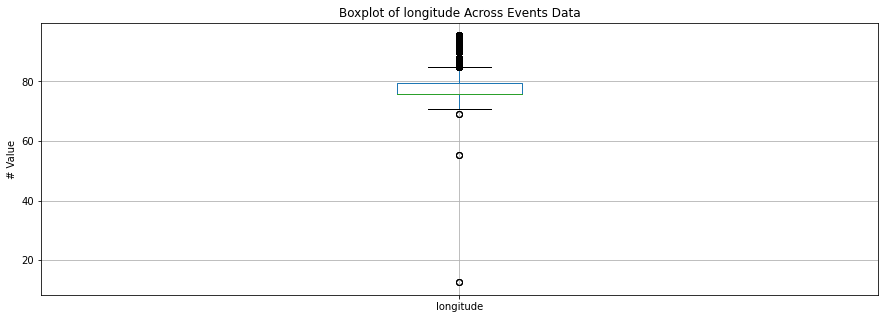

In [56]:
plt.figure(figsize=(15,5))
lat_box = events_1006.boxplot(column=['longitude'])
plt.title('Boxplot of longitude Across Events Data')
plt.ylabel("# Value")

In [57]:
events_1006[events_1006['longitude']<60]

,event_id,device_id,timestamp,longitude,latitude,city,state
82827,170433,4.718753e+18,2016-05-07 01:39:40,12.5674,41.8719,Jaipur,Rajasthan
1598260,3228359,4.718753e+18,2016-05-02 11:50:26,12.5674,41.8719,Jaipur,Rajasthan
2029146,3188661,4.718753e+18,2016-05-07 16:08:20,12.5674,41.8719,Jaipur,Rajasthan
2109310,3176004,-1.926548e+18,2016-05-05 19:45:52,55.2708,25.2048,Bari,Rajasthan
2963678,281233,-1.926548e+18,2016-05-05 16:25:00,55.2708,25.2048,Bari,Rajasthan
3229520,3116389,-1.926548e+18,2016-05-05 19:41:04,55.2708,25.2048,Bari,Rajasthan


In [58]:
events_1006[events_1006['longitude']>95]

,event_id,device_id,timestamp,longitude,latitude,city,state
6414,1574000,-7.520655e+18,2016-05-05 08:20:56,95.407641,27.525724,Tinsukia,Assam
9226,3138571,6.888665e+18,2016-05-05 14:27:52,95.375416,27.548515,Tinsukia,Assam
16830,1573447,6.888665e+18,2016-05-03 08:44:57,95.375416,27.548515,Tinsukia,Assam
21468,383503,5.104017e+18,2016-05-01 15:42:46,95.372990,27.553291,Tinsukia,Assam
32093,1220216,5.104017e+18,2016-05-05 07:28:01,95.372990,27.553291,Tinsukia,Assam
...,...,...,...,...,...,...,...
3222940,1554403,1.532677e+18,2016-05-05 17:09:26,95.422171,27.536170,Tinsukia,Assam
3223203,2992127,6.888665e+18,2016-05-03 08:45:28,95.375416,27.548515,Tinsukia,Assam
3227718,1876383,-6.175495e+18,2016-05-01 10:55:06,95.393036,27.549432,Tinsukia,Assam
3239735,2803054,1.532677e+18,2016-05-06 11:12:59,95.422171,27.536170,Tinsukia,Assam


In [59]:
lat_out = events_1006[events_1006['longitude']>95]['city'].value_counts()
lat_out

Tinsukia     619
Dibrugarh     50
Name: city, dtype: int64

In [60]:
Tinsukia_longitude_mode = events_1006['longitude'][events_1006['city'] == 'Tinsukia'].mode()
Tinsukia_longitude_mode

0    95.375416
dtype: float64

In [61]:
Dibrugarh_longitude_mode = events_1006['longitude'][events_1006['city'] == 'Dibrugarh'].mode()
Dibrugarh_longitude_mode

0    94.984669
dtype: float64

In [62]:
mylist1 = events_1006[(events_1006['longitude']<60) \
                         & (events_1006['city']=='Bari')]['event_id'].index.to_list()
for i in mylist1:
    events_1006.at[i,'longitude']=events_1006[events_1006['city']=='Bari']['longitude'].mode()
    
mylist2 = events_1006[(events_1006['longitude']<60) \
                         & (events_1006['city']=='Jaipur')]['event_id'].index.to_list()
for i in mylist2:
    events_1006.at[i,'longitude']=events_1006[events_1006['city']=='Jaipur']['longitude'].mode()

Text(0, 0.5, '# Value')

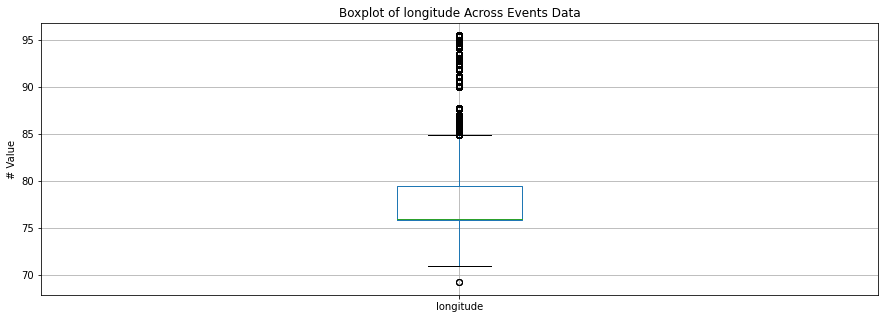

In [63]:
plt.figure(figsize=(15,5))
lat_box1 = events_1006.boxplot(column=['longitude'])
plt.title('Boxplot of longitude Across Events Data')
plt.ylabel("# Value")

Text(0, 0.5, '# Value')

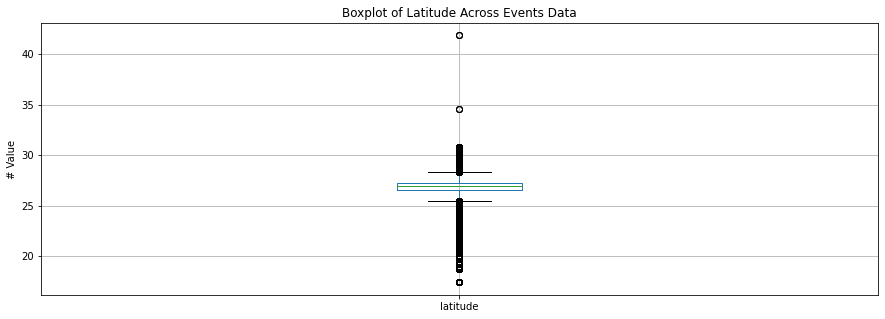

In [64]:
plt.figure(figsize=(15,5))
lat_box = events_1006.boxplot(column=['latitude'])
plt.title('Boxplot of Latitude Across Events Data')
plt.ylabel("# Value")

In [65]:
events_1006[events_1006['latitude']>33]

,event_id,device_id,timestamp,longitude,latitude,city,state
82827,170433,4.718753e+18,2016-05-07 01:39:40,75.894057,41.8719,Jaipur,Rajasthan
1598260,3228359,4.718753e+18,2016-05-02 11:50:26,75.894057,41.8719,Jaipur,Rajasthan
1691284,252730,-3.693511e+18,2016-05-04 15:13:00,69.207500,34.5553,Jaipur,Rajasthan
2029146,3188661,4.718753e+18,2016-05-07 16:08:20,75.894057,41.8719,Jaipur,Rajasthan
2244458,3195812,-3.693511e+18,2016-05-07 12:15:05,69.207500,34.5553,Jaipur,Rajasthan
2838297,3223664,-3.693511e+18,2016-05-01 07:59:07,69.207500,34.5553,Jaipur,Rajasthan


In [66]:
events_1006[events_1006['latitude']<17]

,event_id,device_id,timestamp,longitude,latitude,city,state


In [67]:
mylist3 = events_1006[(events_1006['latitude']>33) \
                         & (events_1006['city']=='Jaipur')]['event_id'].index.to_list()
for i in mylist1:
    events_1006.at[i,'latitude']=events_1006[events_1006['city']=='Jaipur']['latitude'].mode()

Text(0, 0.5, '# Value')

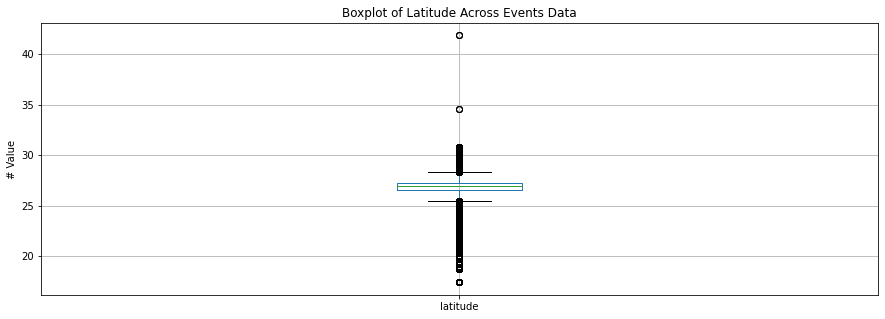

In [68]:
plt.figure(figsize=(15,5))
lat_box1 = events_1006.boxplot(column=['latitude'])
plt.title('Boxplot of Latitude Across Events Data')
plt.ylabel("# Value")

In [69]:
events_1006[events_1006['latitude']>33]

,event_id,device_id,timestamp,longitude,latitude,city,state
82827,170433,4.718753e+18,2016-05-07 01:39:40,75.894057,41.8719,Jaipur,Rajasthan
1598260,3228359,4.718753e+18,2016-05-02 11:50:26,75.894057,41.8719,Jaipur,Rajasthan
1691284,252730,-3.693511e+18,2016-05-04 15:13:00,69.207500,34.5553,Jaipur,Rajasthan
2029146,3188661,4.718753e+18,2016-05-07 16:08:20,75.894057,41.8719,Jaipur,Rajasthan
2244458,3195812,-3.693511e+18,2016-05-07 12:15:05,69.207500,34.5553,Jaipur,Rajasthan
2838297,3223664,-3.693511e+18,2016-05-01 07:59:07,69.207500,34.5553,Jaipur,Rajasthan


In [70]:
mylist3 = events_1006[(events_1006['latitude']>33) \
                         & (events_1006['city']=='Jaipur')]['event_id'].index.to_list()
for i in mylist1:
    events_1006.at[i,'latitude']=events_1006[events_1006['city']=='Jaipur']['latitude'].mode()

In [71]:
events_1006.isnull().sum()

event_id      0
device_id    81
timestamp     0
longitude     0
latitude      0
city          0
state         0
dtype: int64

### 4.4 Treating missing device ids

In [72]:
events_1006[events_1006['device_id'].isnull()]['state'].unique()

array(['Rajasthan'], dtype=object)

In [73]:
events_1006[events_1006['device_id'].isnull()]['city'].unique()

array(['Jaipur'], dtype=object)

In [74]:
events_1006['device_id'][events_1006['city']=='Jaipur'].mode()

0   -5.330179e+18
dtype: float64

In [75]:
events_1006.loc[(events_1006['city'] =='Jaipur') \
                   & (events_1006['device_id'].isnull()),'device_id']= '-5.330179e+18'

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [76]:
events_1006.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### 4.5 Final merger of datasets

In [77]:
gender['device_id']=gender['device_id'].astype(float)

In [78]:
phone['device_id']=phone['device_id'].astype(float)

In [79]:
events_1006['device_id']=events_1006['device_id'].astype(float)

<ipython-input-79-f3af6e2056bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_1006['device_id']=events_1006['device_id'].astype(float)


In [80]:
df_final = events_1006.merge(phone,on='device_id').merge(gender,on='device_id')

In [81]:
df_final.shape

(370901, 12)

In [82]:
df_final.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,make,model,gender,age,age_group
0,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,Millet,MI 4,M,30,M29-31
1,2386347,3.388880e+17,2016-05-06 05:00:17,85.997745,23.842609,Bokaro,Jharkhand,Millet,MI 4,M,30,M29-31
2,2246062,3.388880e+17,2016-05-03 19:16:13,85.997745,23.842609,Bokaro,Jharkhand,Millet,MI 4,M,30,M29-31
3,1895659,3.388880e+17,2016-05-02 12:40:16,85.997745,23.842609,Bokaro,Jharkhand,Millet,MI 4,M,30,M29-31
4,501580,3.388880e+17,2016-05-06 14:26:43,85.997745,23.842609,Bokaro,Jharkhand,Millet,MI 4,M,30,M29-31


In [83]:
df_final['device_id'] = df_final['device_id'].apply(np.int64)

In [84]:
df_final.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,make,model,gender,age,age_group
0,665740,338888002570799936,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,Millet,MI 4,M,30,M29-31
1,2386347,338888002570799936,2016-05-06 05:00:17,85.997745,23.842609,Bokaro,Jharkhand,Millet,MI 4,M,30,M29-31
2,2246062,338888002570799936,2016-05-03 19:16:13,85.997745,23.842609,Bokaro,Jharkhand,Millet,MI 4,M,30,M29-31
3,1895659,338888002570799936,2016-05-02 12:40:16,85.997745,23.842609,Bokaro,Jharkhand,Millet,MI 4,M,30,M29-31
4,501580,338888002570799936,2016-05-06 14:26:43,85.997745,23.842609,Bokaro,Jharkhand,Millet,MI 4,M,30,M29-31


In [85]:
df_final.tail()

,event_id,device_id,timestamp,longitude,latitude,city,state,make,model,gender,age,age_group
370896,386459,2987254040565051904,2016-05-05 20:24:14,75.866907,26.192900,Tonk,Rajasthan,Charming,MX4,M,23,M23-26
370897,2415227,-75056865623603456,2016-05-01 06:34:09,94.944848,27.505764,Dibrugarh,Assam,Charming,魅蓝NOTE,M,31,M29-31
370898,2474678,7324027991671153664,2016-05-06 09:40:04,75.698343,25.477653,Bundi,Rajasthan,Samsung,Galaxy Note 3,M,29,M29-31
370899,820237,5445034754773583872,2016-05-04 15:37:22,78.529974,17.435192,Hyderabad,Telangana,Samsung,A6800,M,33,M32-38
370900,2170713,5838483526065661952,2016-05-07 22:18:57,76.422242,26.947862,Daosa,Rajasthan,Samsung,S880i,M,28,M27-28


In [86]:
df_final.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
make         0
model        0
gender       0
age          0
age_group    0
dtype: int64

In [87]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370901 entries, 0 to 370900
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   370901 non-null  int64  
 1   device_id  370901 non-null  int64  
 2   timestamp  370901 non-null  object 
 3   longitude  370901 non-null  float64
 4   latitude   370901 non-null  float64
 5   city       370901 non-null  object 
 6   state      370901 non-null  object 
 7   make       370901 non-null  object 
 8   model      370901 non-null  object 
 9   gender     370901 non-null  object 
 10  age        370901 non-null  int64  
 11  age_group  370901 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.8+ MB


In [88]:
df_final.to_csv('D:/GCDAI/Capstone_1/df_final.csv', index = False)
# csv file for dashboard 

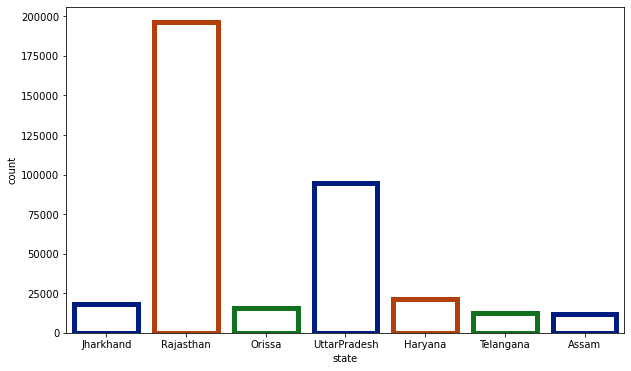

In [89]:
plt.figure(figsize=(10, 6))
device_id_dist = sns.countplot(x="state", data=df_final,
                   linewidth=5, facecolor=(0, 0, 0, 0),
                   edgecolor=sns.color_palette("dark", 3))

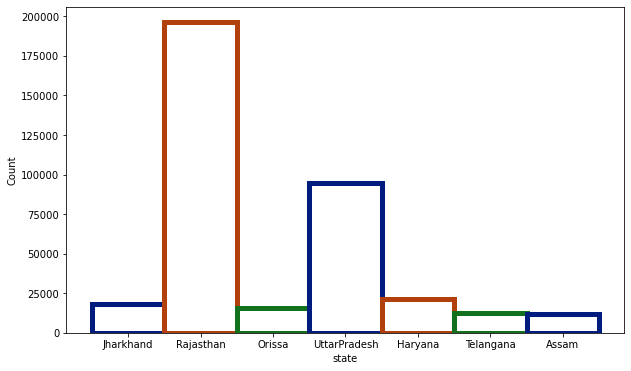

In [90]:
plt.figure(figsize=(10, 6))
device_id_dist1 = sns.histplot(x="state", data=df_final,
                   linewidth=5, facecolor=(0, 0, 0, 0),
                   edgecolor=sns.color_palette("dark", 3))

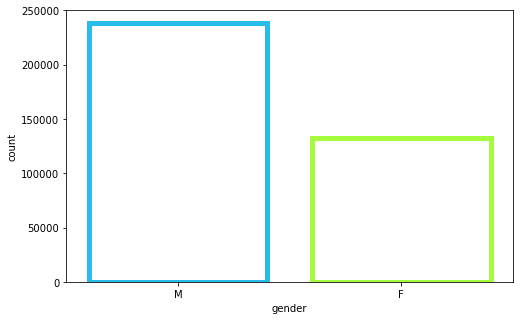

In [91]:
plt.figure(figsize=(8, 5))
gender_dist = sns.countplot(x="gender", data=df_final,
                   linewidth=5, facecolor=(0, 0, 0, 0),
                   edgecolor=sns.color_palette("turbo", 3))

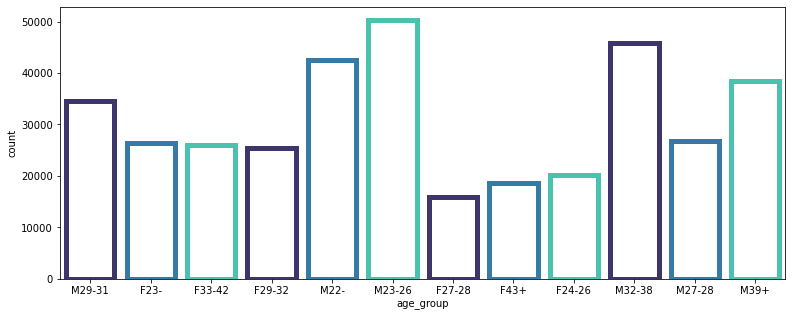

In [92]:
plt.figure(figsize=(13,5))
age_dist = sns.countplot(x="age_group", data=df_final,
                   linewidth=5, facecolor=(0, 0, 0, 0),
                   edgecolor=sns.color_palette("mako", 3))

## 5. Plots 

In [93]:
df_final_plot = df_final[['device_id','state','make','gender','age','age_group']]

In [94]:
df_final_plot.drop_duplicates(inplace=True)

<ipython-input-94-ee67534324a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_plot.drop_duplicates(inplace=True)


In [95]:
df_final_plot.shape

(12491, 6)

In [96]:
df_final_plot['state'].value_counts()

UttarPradesh    3660
Rajasthan       3093
Telangana       3045
Haryana          816
Jharkhand        739
Orissa           655
Assam            483
Name: state, dtype: int64

Text(0.5, 1.0, 'Users state wise')

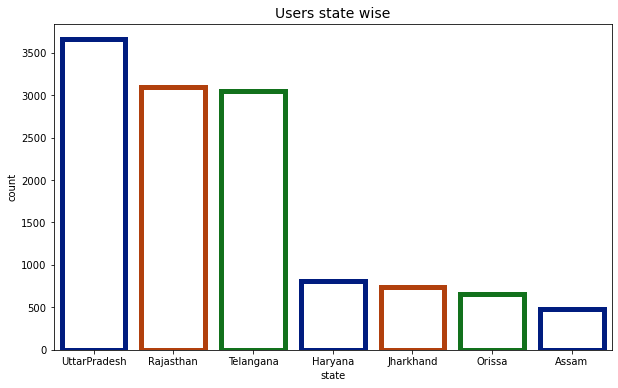

In [97]:
plt.figure(figsize=(10, 6))
device_id_dist = sns.countplot(x="state", data=df_final_plot,
                   linewidth=5, facecolor=(0, 0, 0, 0),
                   edgecolor=sns.color_palette("dark", 3), order = df_final_plot['state'].value_counts().index)
plt.title("Users state wise", fontsize=14)

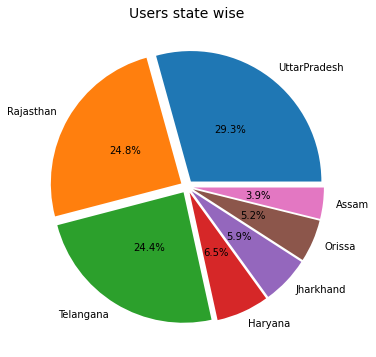

In [98]:
statedata = df_final_plot['state'].value_counts()

pie, ax = plt.subplots(figsize=[10,6])
labels = statedata.keys()
plt.pie(x=statedata, autopct="%.1f%%", explode=[0.05]*7, labels=labels, pctdistance=0.5)
plt.title("Users state wise", fontsize=14);

In [99]:
df_final_plot['make'].value_counts().nlargest(10)

Millet          3128
Samsung         2785
Huawei          2066
alive           1116
Oppo             933
Charming         774
Cool             582
HTC              203
Association      137
Nubia             94
Name: make, dtype: int64

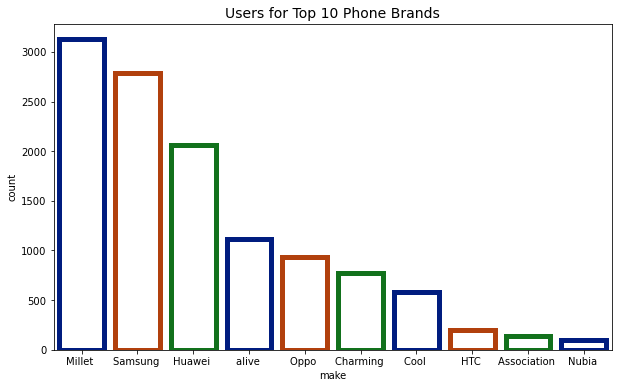

In [100]:
plt.figure(figsize=(10, 6))
make_dist = sns.countplot(x="make", data=df_final_plot,
                   linewidth=5, facecolor=(0, 0, 0, 0),
                   edgecolor=sns.color_palette("dark", 3), order = df_final_plot['make'].value_counts().nlargest(10).index)
plt.title("Users for Top 10 Phone Brands", fontsize=14);

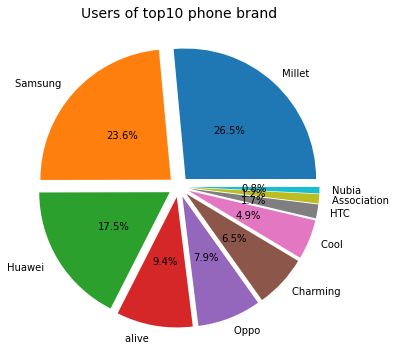

In [101]:
make = df_final_plot['make'].value_counts().nlargest(10)

pie, ax = plt.subplots(figsize=[10,6])
labels = make.keys()
plt.pie(x=make, autopct="%.1f%%", explode=[0.08]*10, labels=labels, pctdistance=0.5)
plt.title("Users of top10 phone brand", fontsize=14);

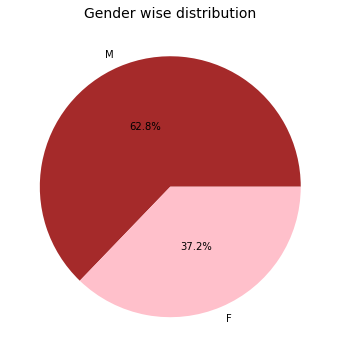

In [102]:
gender = df_final_plot['gender'].value_counts()

pie, ax = plt.subplots(figsize=[10,6])
labels = gender.keys()
plt.pie(x=gender, autopct="%.1f%%",  labels=labels, pctdistance=0.5, colors = ('brown','pink'))
plt.title("Gender wise distribution", fontsize=14);

In [103]:
df_final_plot['gender'].value_counts()

M    7845
F    4646
Name: gender, dtype: int64

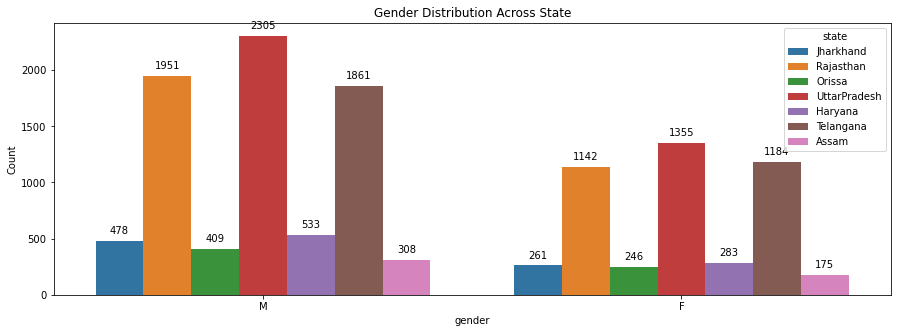

In [104]:
total = len(df_final_plot['gender'])*1.
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
gender_state = sns.countplot(x='gender', hue="state", data=df_final_plot, ax=axis1)
plt.title("Gender Distribution Across State")
plt.ylabel('Count')
for p in gender_state.patches:
    gender_state.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

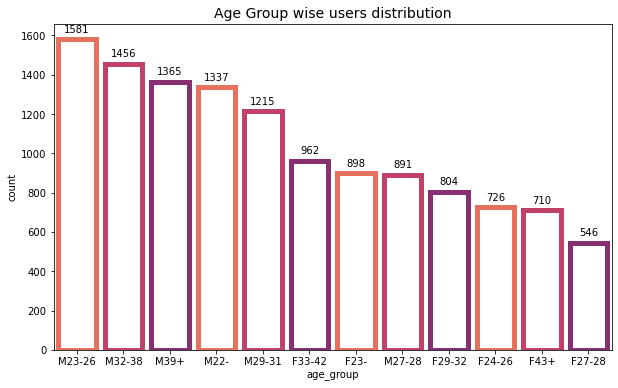

In [105]:
plt.figure(figsize=(10, 6))
age_group_dist = sns.countplot(x="age_group", data=df_final_plot,
                   linewidth=5, facecolor=(0, 0, 0, 0),
                   edgecolor=sns.color_palette("flare", 3), order = df_final_plot['age_group'].value_counts().index)
for p in age_group_dist.patches:
    age_group_dist.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Age Group wise users distribution", fontsize=14);

Text(0.5, 1.0, 'Age distribution Across States')

<Figure size 1080x360 with 0 Axes>

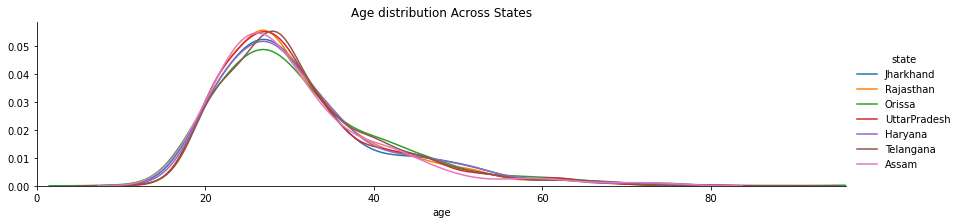

In [106]:
plt.figure(figsize=(15,5))
agegroup = sns.FacetGrid(df_final_plot, hue="state",aspect=4)
agegroup.map(sns.kdeplot,'age') 
agegroup.set(xlim=(0, df_final_plot['age'].max()))
agegroup.add_legend()
plt.title("Age distribution Across States")

Text(0.5, 1.0, 'Top 10 Phone Brand Distribution Across States')

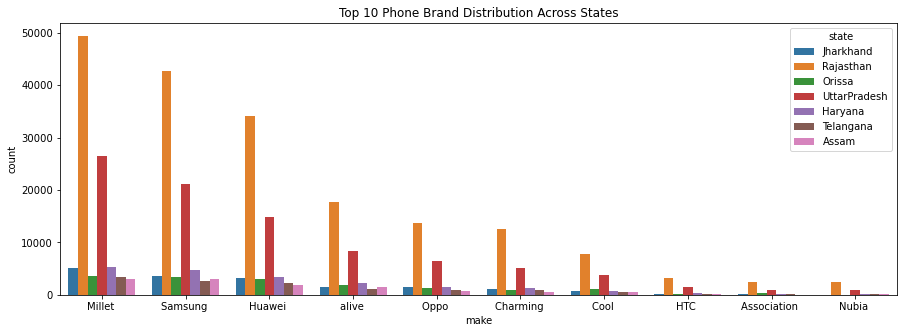

In [107]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='make', hue="state",order=df_final_plot.make.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Top 10 Phone Brand Distribution Across States")

Text(0.5, 1.0, 'Top 10 Phone Brand Distribution Across Age Groups')

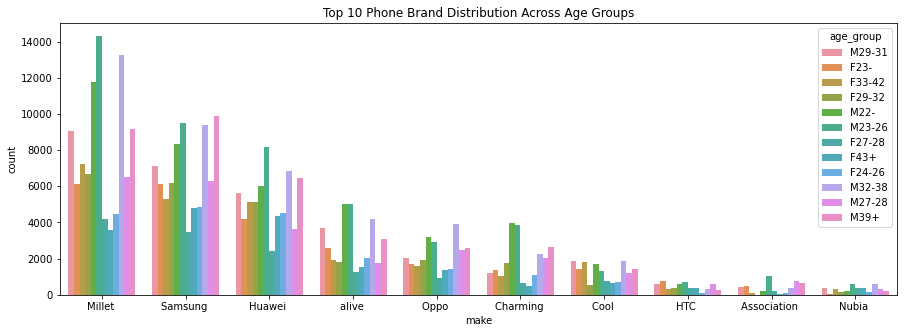

In [108]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='make', hue="age_group",order=df_final_plot.make.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Top 10 Phone Brand Distribution Across Age Groups")

Text(0.5, 1.0, 'Top 10 Phone Brand Distribution Across Gender')

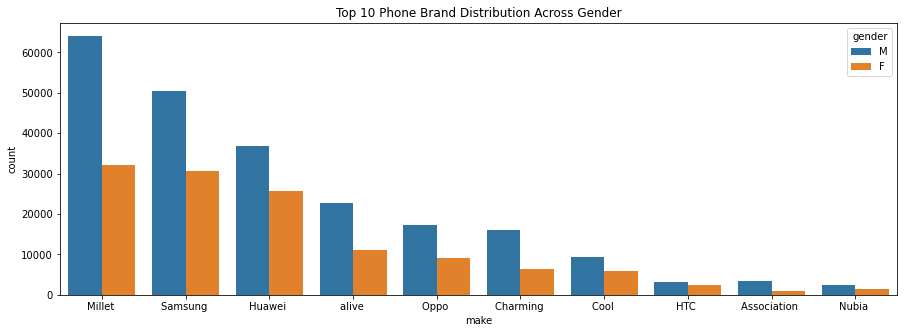

In [109]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='make', hue="gender",order=df_final_plot.make.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Top 10 Phone Brand Distribution Across Gender")

Text(0.5, 1.0, 'Age Group Distribution Across States')

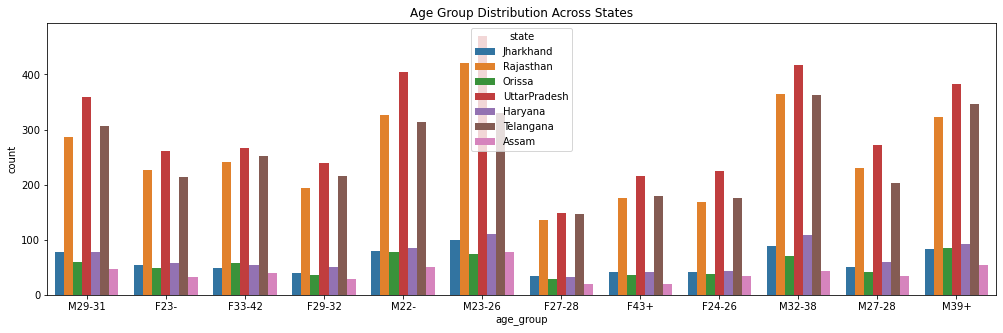

In [110]:
fig, axis1 = plt.subplots(1,1,figsize=(17,5))
sns.countplot(x='age_group', hue="state", data=df_final_plot, ax=axis1)
plt.title("Age Group Distribution Across States")

Text(0.5, 1.0, 'Gender Distribution Across States')

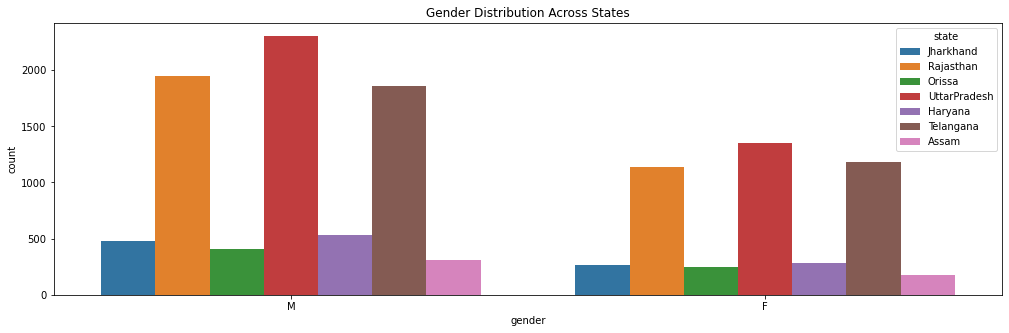

In [111]:
fig, axis1 = plt.subplots(1,1,figsize=(17,5))
sns.countplot(x='gender', hue="state", data=df_final_plot, ax=axis1)
plt.title("Gender Distribution Across States")

Text(0.5, 1.0, 'Top 10 Phone Brand Distribution Across Gender')

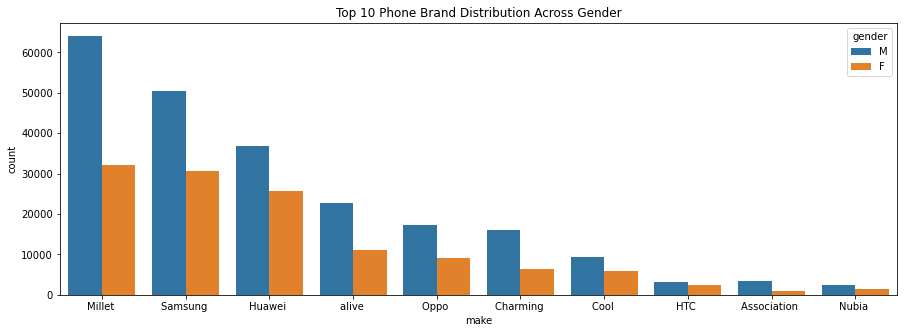

In [112]:
fig, axis1 = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='make', hue="gender",order=df_final_plot.make.value_counts().iloc[:10].index, data=df_final, ax=axis1)
plt.title("Top 10 Phone Brand Distribution Across Gender")

In [113]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370901 entries, 0 to 370900
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   event_id   370901 non-null  int64  
 1   device_id  370901 non-null  int64  
 2   timestamp  370901 non-null  object 
 3   longitude  370901 non-null  float64
 4   latitude   370901 non-null  float64
 5   city       370901 non-null  object 
 6   state      370901 non-null  object 
 7   make       370901 non-null  object 
 8   model      370901 non-null  object 
 9   gender     370901 non-null  object 
 10  age        370901 non-null  int64  
 11  age_group  370901 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 46.8+ MB


In [114]:
df_final['timestamp']=pd.to_datetime(df_final['timestamp'])

In [115]:
df_final['time_range'] = df_final['timestamp'].dt.hour

<Figure size 1080x360 with 0 Axes>

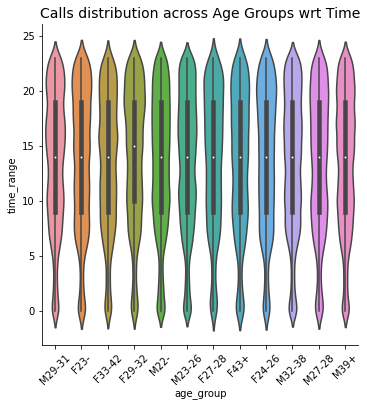

In [116]:
plt.figure(figsize=(15,5))
g = sns.catplot(x="age_group", y='time_range', kind="violin", data=df_final)
g.set_xticklabels(rotation=45)
plt.title("Calls distribution across Age Groups wrt Time", fontsize=14);

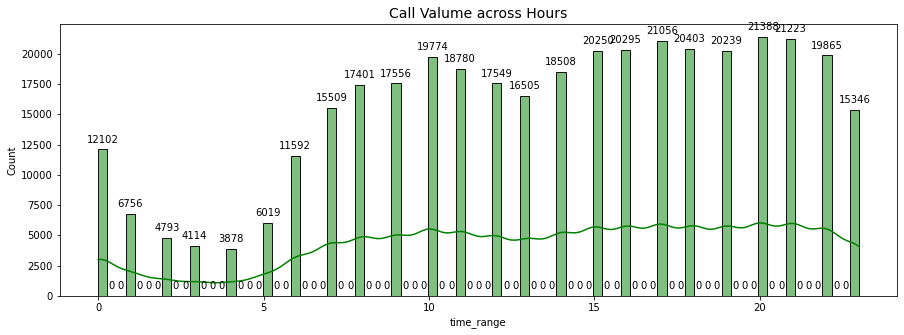

In [117]:
plt.figure(figsize=(15,5))
calldist = sns.histplot(data=df_final, x="time_range", color="green" , kde=True)
for p in calldist.patches:
    calldist.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Call Valume across Hours", fontsize=14);

In [118]:
pip install folium

In [119]:
import folium
from folium.plugins import MarkerCluster

In [120]:
#plugins.MarkerCluster()

In [121]:
#temp = MarkerCluster()

In [1]:
map = folium.Map(location=[22.356359, 79.395484], zoom_start=5)
temp = MarkerCluster()
state_list = ['Rajasthan', 'UttarPradesh', 'Haryana', 'Jharkhand', 'Orissa', 'Telangana', 'Assam']

for state in state_list:
    mapping_data = df_final[['latitude', 'longitude','city']][df_final['state']==state]
    citylist = mapping_data['city'].tolist()
        
    locations = mapping_data[['latitude', 'longitude']]
    locationlist = locations.values.tolist()
    
    for index, item in enumerate(locationlist):
        temp.add_child(folium.Marker(location=item, popup=citylist[index]))
                             
map.add_child(temp)
map.save("state_wise_map_plot2.html")

NameError: name 'folium' is not defined

## 6. Conclusion

Consulting report shared over separeate file